In [16]:
import numpy as np
import pandas as pd
import quandl
from risk import Risk
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [18, 10]

risk = Risk()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
quandl.ApiConfig.api_key = "qR4f7Msn621BzZdhy-Px"


df = quandl.get_table('WIKI/PRICES', ticker = ['AMZN', 'AAPL', 'REGI'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2001-01-11', 'lte': '2020-08-10' }, 
                        paginate=True)

new = df.set_index('date')
df = new.pivot(columns='ticker', values="adj_close")
df = df.dropna()
df.head()

ticker,AAPL,AMZN,REGI
date,,,
2012-01-19,54.971837,194.45,10.10
2012-01-20,54.014408,190.93,9.73
2012-01-23,54.928014,186.09,9.49
2012-01-24,54.028545,187.00,9.85
2012-01-25,57.402035,187.80,9.82


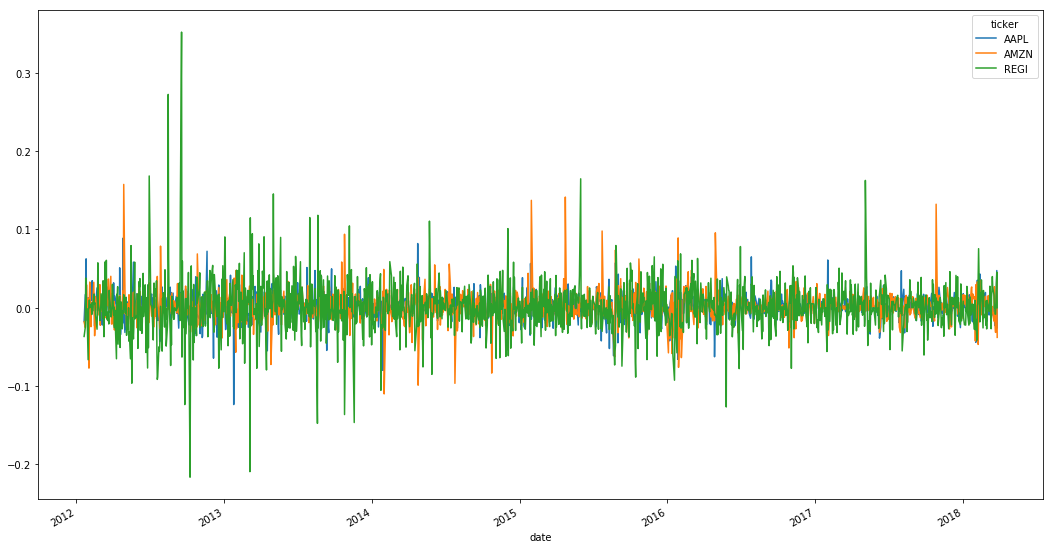

In [19]:
returns_daily = df.pct_change()
returns_daily = returns_daily.dropna()
returns_daily.plot()

In [20]:
returns_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1554 entries, 2012-01-20 to 2018-03-27
Data columns (total 3 columns):
AAPL    1554 non-null float64
AMZN    1554 non-null float64
REGI    1554 non-null float64
dtypes: float64(3)
memory usage: 48.6 KB


1. compute a wealth index
2. compute prev peaks
3. compute drawdown

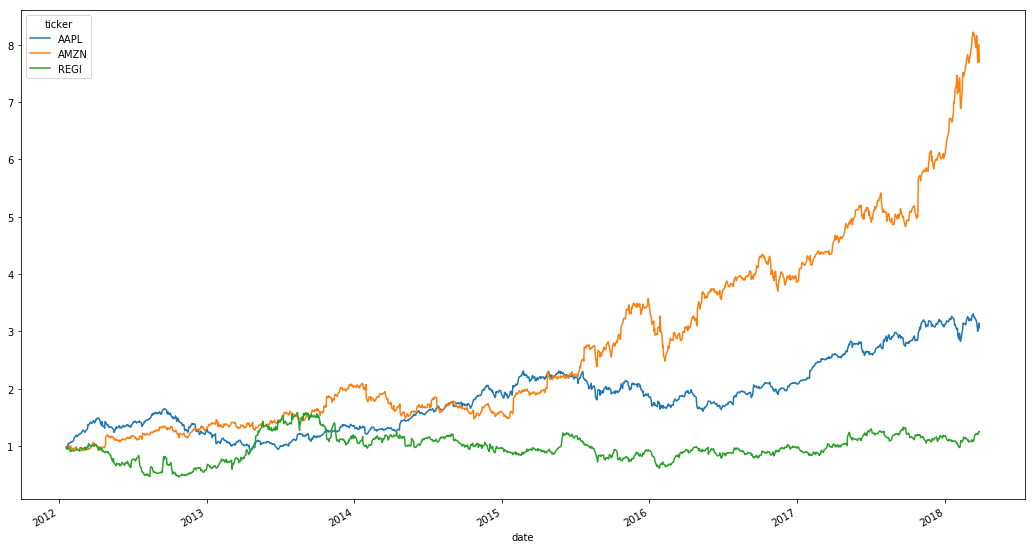

In [21]:
investment = 1
wealth_index = investment * (1+returns_daily).cumprod()
wealth_index.plot()

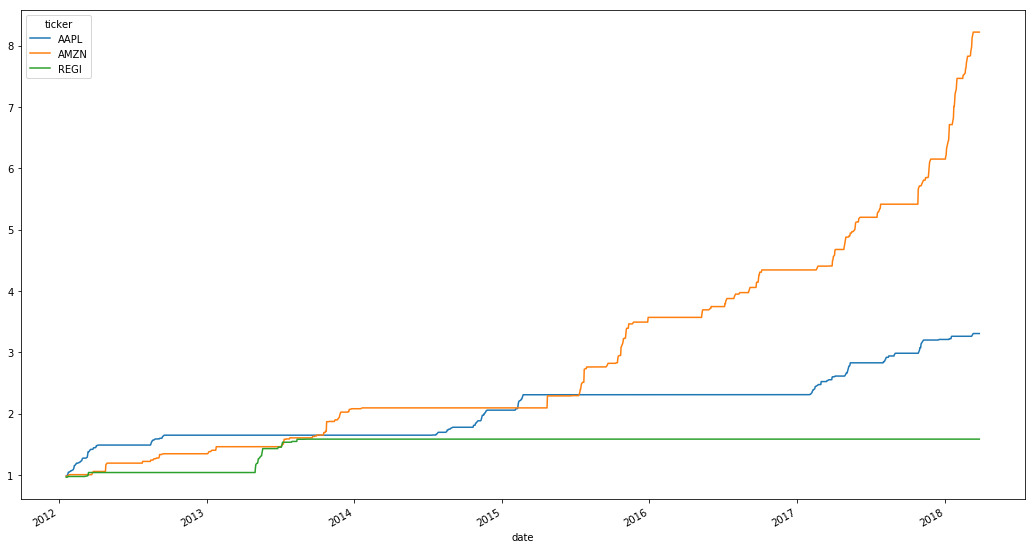

In [22]:
prev_peaks = wealth_index.cummax()
prev_peaks.plot()

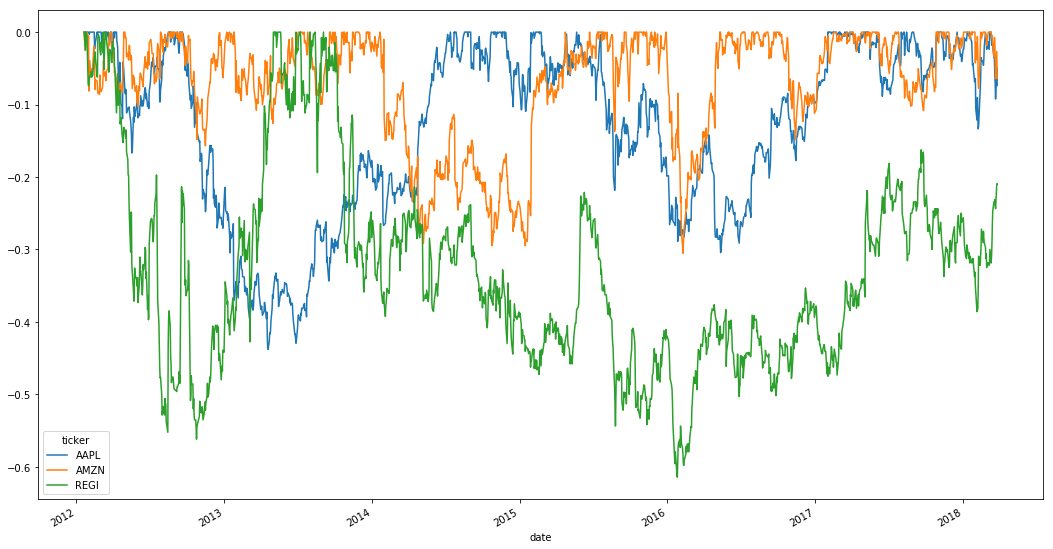

In [23]:
drawdown = (wealth_index - prev_peaks) / prev_peaks
drawdown.plot()

In [24]:
drawdown.head()

ticker,AAPL,AMZN,REGI
date,,,
2012-01-20,0.000000,0.000000,0.000000
2012-01-23,0.000000,-0.025350,-0.024666
2012-01-24,-0.016375,-0.020583,0.000000
2012-01-25,0.000000,-0.016393,-0.003046
2012-01-26,-0.004545,0.000000,-0.004061


In [27]:
risk.drawdown(returns_daily).head()

ticker,AAPL,AMZN,REGI
date,,,
2012-01-20,0.000000,0.000000,0.000000
2012-01-23,0.000000,-0.025350,-0.024666
2012-01-24,-0.016375,-0.020583,0.000000
2012-01-25,0.000000,-0.016393,-0.003046
2012-01-26,-0.004545,0.000000,-0.004061
